<a href="https://colab.research.google.com/github/AugustoBarrero/PROYECTO/blob/main/PROYECTO_FINAL_PROYECCIONES_GAS_BOLIVIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
#Cargado del documento de excel
file_path = '/content/Producción Gas Natural 2013 - 2023.xlsx'
data_csv = pd.read_excel(file_path)

In [4]:
#Se muestran las primeras filas del dataframe
data_csv

,AÑO,MES,CHUQUISACA,COCHABAMBA,TARIJA,SANTA CRUZ
0,2013,Enero,135.026322,79.896134,1151.262879,308.643641
1,2013,Febrero,141.053281,70.420551,1098.949425,298.029806
2,2013,Marzo,157.565119,77.577125,1219.897232,336.874464
3,2013,Abril,124.842450,74.655421,1100.458231,323.095400
4,2013,Mayo,155.750236,78.012016,1199.014008,350.983165
...,...,...,...,...,...,...
125,2023,Junio,190.536013,18.018408,504.160248,391.879188
126,2023,Julio,192.835313,18.244830,518.185471,403.755077
127,2023,Agosto,179.180872,17.883171,494.053058,401.281582
128,2023,Septiembre,181.678191,16.819331,487.430370,395.182701


# **Preparación y Limpieza de datos**

In [5]:
months = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

In [6]:
data_csv['MES'] = data_csv['MES'].map(months)

In [7]:
data_csv.head(25)

,AÑO,MES,CHUQUISACA,COCHABAMBA,TARIJA,SANTA CRUZ
0,2013,NaN,135.026322,79.896134,1151.262879,308.643641
1,2013,2.0,141.053281,70.420551,1098.949425,298.029806
2,2013,3.0,157.565119,77.577125,1219.897232,336.874464
3,2013,4.0,124.842450,74.655421,1100.458231,323.095400
4,2013,5.0,155.750236,78.012016,1199.014008,350.983165
5,2013,6.0,153.579239,73.137355,1213.830064,341.563621
6,2013,7.0,161.524466,74.379332,1241.357468,353.985629
7,2013,8.0,163.260204,73.892763,1251.287565,354.224736
8,2013,9.0,168.236692,69.304698,1195.504588,325.427916
9,2013,10.0,192.779727,70.768962,1253.664962,330.414994


In [8]:
missing_values = data_csv.isnull().sum()

In [9]:
missing_values

AÑO           0
MES           7
CHUQUISACA    0
COCHABAMBA    0
TARIJA        0
SANTA CRUZ    0
dtype: int64

In [10]:
data_csv['MES'].fillna(1, inplace=True)

In [11]:
missing_values = data_csv.isnull().sum()

In [12]:
missing_values

AÑO           0
MES           0
CHUQUISACA    0
COCHABAMBA    0
TARIJA        0
SANTA CRUZ    0
dtype: int64

In [13]:
data_csv.head(25)

,AÑO,MES,CHUQUISACA,COCHABAMBA,TARIJA,SANTA CRUZ
0,2013,1.0,135.026322,79.896134,1151.262879,308.643641
1,2013,2.0,141.053281,70.420551,1098.949425,298.029806
2,2013,3.0,157.565119,77.577125,1219.897232,336.874464
3,2013,4.0,124.842450,74.655421,1100.458231,323.095400
4,2013,5.0,155.750236,78.012016,1199.014008,350.983165
5,2013,6.0,153.579239,73.137355,1213.830064,341.563621
6,2013,7.0,161.524466,74.379332,1241.357468,353.985629
7,2013,8.0,163.260204,73.892763,1251.287565,354.224736
8,2013,9.0,168.236692,69.304698,1195.504588,325.427916
9,2013,10.0,192.779727,70.768962,1253.664962,330.414994


# **Aplicación de modelos**

## **COCHABAMBA**

### Random Forest

In [14]:
# Crear características lag para COCHABAMBA
for lag in range(1, 13):
    data_csv[f'COCHABAMBA_LAG_{lag}'] = data_csv['COCHABAMBA'].shift(12 - lag + 1)

In [15]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rf = data_csv.dropna()

In [16]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rf[[f'COCHABAMBA_LAG_{lag}' for lag in range(1, 13)]]

In [17]:
# Variable dependiente (objetivo)
y = data_rf['COCHABAMBA']

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Crear y entrenar el modelo Random Forest
rf_model_cb = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_cb.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# El modelo está entrenado, ahora prepararemos la lógica para hacer las predicciones para los próximos 6 meses

# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_csv[data_csv['AÑO'] == 2022]['COCHABAMBA'].values

In [21]:
# Realizar predicciones para los primeros 6 meses del 2023
predicciones_rf = []
for _ in range(6):
    predicted_production = rf_model_cb.predict(np.array(input_features).reshape(1, -1))
    predicciones_rf.append(predicted_production[0])
    input_features = np.append(input_features[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [22]:
predicciones_rf

[19.04775771120225,
 18.026443338623768,
 18.742867038222652,
 17.997869370081652,
 18.545271641275804,
 18.07880128219841]

In [23]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['COCHABAMBA'].values

In [24]:
datos_reales

array([19.55026473, 17.26877612, 19.01272596, 18.23777873, 18.79972662,
       18.01840809])

In [25]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rf)
mae = np.mean(np.abs(datos_reales - predicciones_rf))

In [26]:
# Error cuadrático medio Random Forest
mse

0.17089132041731067

In [27]:
# Error absoluto medio Random Forest
mae

0.3474651132316365

In [28]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

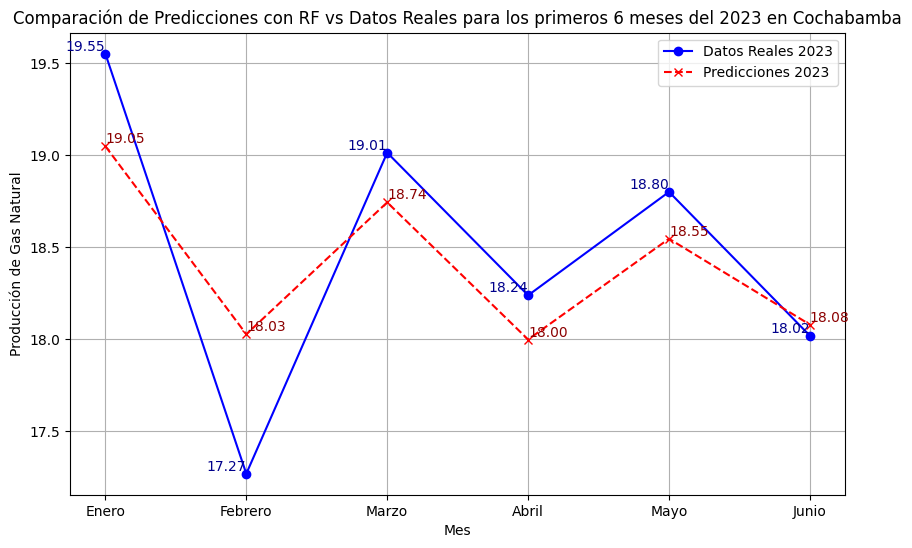

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones 2023', marker='x', linestyle='--', color='red')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rf):
    plt.text(meses[i], predicciones_rf[i], f"{txt:.2f}", color='darkred', ha='left', va='bottom')
plt.title('Comparación de Predicciones con RF vs Datos Reales para los primeros 6 meses del 2023 en Cochabamba')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Red Neuronal Recurrente (RNN)

In [30]:
#Crear dataframe
data_rnn = data_csv.copy()

In [31]:
# Instanciar MinMaxScaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

In [32]:
# Escalar la columna COCHABAMBA y reemplazar en el nuevo dataframe
data_rnn['COCHABAMBA'] = scaler.fit_transform(data_rnn[['COCHABAMBA']].values.reshape(-1, 1))

In [33]:
# Crear características lag para COCHABAMBA
for lag in range(1, 13):
    data_rnn[f'COCHABAMBA_LAG_{lag}'] = data_rnn['COCHABAMBA'].shift(12 - lag + 1)

In [34]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rnn = data_rnn.dropna()

In [35]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rnn[[f'COCHABAMBA_LAG_{lag}' for lag in range(1, 13)]].values

In [36]:
# Variable dependiente (objetivo)
y = data_rnn['COCHABAMBA'].values

In [37]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [38]:
# Construir el modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, verbose=0)

In [40]:
# Preparar para hacer predicciones para los próximos 6 meses
# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_rnn[data_rnn['AÑO'] == 2022]['COCHABAMBA'].values

In [41]:
# Lista para almacenar las predicciones
predicciones_rnn = []

for _ in range(6):
    # Escalar los últimos 12 valores
    input_features_scaled = scaler.transform(input_features.reshape(-1, 1)).reshape(1, 12, 1)

    # Hacer la predicción para el siguiente mes
    prediccion_produccion = model.predict(input_features_scaled)

    # Invertir la escala para obtener la predicción real
    prediccion_produccion_real = scaler.inverse_transform(prediccion_produccion)

    # Añadir la predicción al conjunto de datos conocido
    input_features = np.append(input_features[1:], prediccion_produccion_real)

    # Añadir la predicción a la lista de predicciones
    predicciones_rnn.append(prediccion_produccion_real[0][0])

1/1 [==============================] - 0s 21ms/step


In [42]:
predicciones_rnn

[21.0828, 19.423283, 18.744053, 18.611574, 19.189024, 20.173056]

In [43]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['COCHABAMBA'].values

In [44]:
datos_reales

array([19.55026473, 17.26877612, 19.01272596, 18.23777873, 18.79972662,
       18.01840809])

In [45]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rnn)
mae = np.mean(np.abs(datos_reales - predicciones_rnn))

In [46]:
# Error cuadrático medio Red Neuronal Recurrente
mse

1.999421525254961

In [47]:
# Error absoluto medio Red Neuronal Recurrente
mae

1.1455758536520186

In [48]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

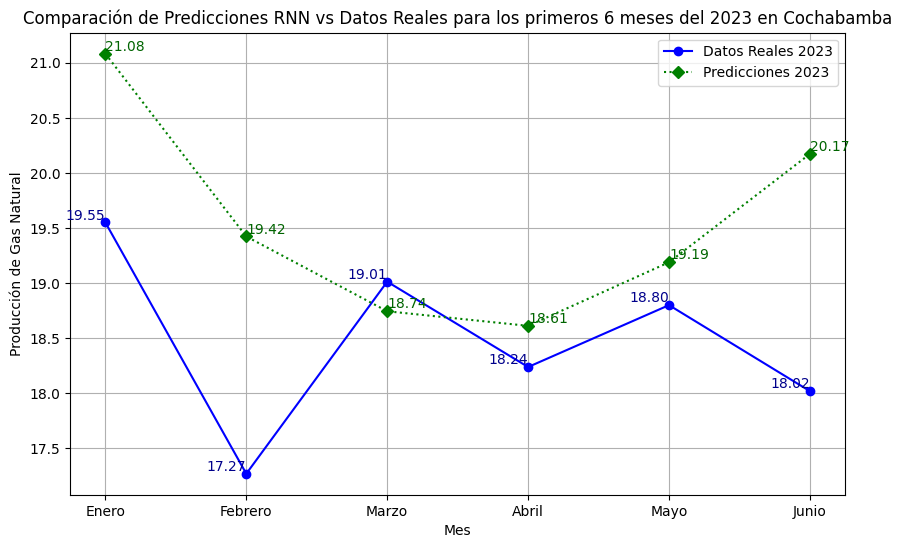

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rnn, label='Predicciones 2023', marker='D', linestyle=':', color='green')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rnn):
    plt.text(meses[i], predicciones_rnn[i], f"{txt:.2f}", color='darkgreen', ha='left', va='bottom')
plt.title('Comparación de Predicciones RNN vs Datos Reales para los primeros 6 meses del 2023 en Cochabamba')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### SARIMA

In [50]:
# Preparar la serie temporal de COCHABAMBA
Cochabamba_ts = data_csv['COCHABAMBA']

In [51]:
# Dividir los datos en conjuntos de entrenamiento y prueba (No es necesario para la predicción futura, pero se muestra para completitud)
train_size = int(len(Cochabamba_ts) * 0.8)
train_data = Cochabamba_ts[:train_size]
test_data = Cochabamba_ts[train_size:]

In [52]:
#Para hallar valores óptimos para SARIMA (comentado para evitar sobrecarga de ejecución)
"""
import itertools
import warnings

# Definir los rangos de parámetros a probar
p = d = q = range(0, 3)  # Probar valores de 0 a 2 para p, d, q
pdq = list(itertools.product(p, d, q))  # Combinaciones de p, d, q

# Establecer la estacionalidad a 12 meses
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Combinaciones de P, D, Q con s=12

warnings.filterwarnings("ignore")  # Ignorar las advertencias de convergencia para mantener la salida limpia

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

# Bucle para probar las diferentes combinaciones de parámetros
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = model.fit(disp=False)

            # Comparar el AIC para encontrar la mejor combinación
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except:
            continue

"""

'\nimport itertools\nimport warnings\n\n# Definir los rangos de parámetros a probar\np = d = q = range(0, 3)  # Probar valores de 0 a 2 para p, d, q\npdq = list(itertools.product(p, d, q))  # Combinaciones de p, d, q\n\n# Establecer la estacionalidad a 12 meses\nseasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Combinaciones de P, D, Q con s=12\n\nwarnings.filterwarnings("ignore")  # Ignorar las advertencias de convergencia para mantener la salida limpia\n\nbest_aic = float("inf")\nbest_pdq = None\nbest_seasonal_pdq = None\n\n# Bucle para probar las diferentes combinaciones de parámetros\nfor param in pdq:\n    for param_seasonal in seasonal_pdq:\n        try:\n            model = SARIMAX(train_data,\n                            order=param,\n                            seasonal_order=param_seasonal,\n                            enforce_stationarity=False,\n                            enforce_invertibility=False)\n\n            results = model.fit(disp=False)\n\n            # Com

In [53]:
# best_aic, best_pdq, best_seasonal_pdq

In [54]:
# Ajustar el modelo SARIMA con los datos de entrenamiento
model_sarima = SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(2, 2, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit_cb = model_sarima.fit(disp=False)  # disp=False para reducir la salida durante el ajuste

In [55]:
# Revisar el índice para los valores del año 2023
data_csv[(data_csv['AÑO'] == 2023)]['COCHABAMBA']

120    19.550265
121    17.268776
122    19.012726
123    18.237779
124    18.799727
125    18.018408
126    18.244830
127    17.883171
128    16.819331
129    17.472822
Name: COCHABAMBA, dtype: float64

In [56]:
# Realizamos predicciones para 2023 con SARIMA
predicciones_sarima = model_sarima_fit_cb.predict(start=120, end=125).values

In [57]:
predicciones_sarima

array([13.00314758, 11.33740544, 12.85659606, 12.48464778, 11.72284654,
        8.25076828])

In [58]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['COCHABAMBA'].values

In [59]:
datos_reales

array([19.55026473, 17.26877612, 19.01272596, 18.23777873, 18.79972662,
       18.01840809])

In [60]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_sarima)
mae = np.mean(np.abs(datos_reales - predicciones_sarima))

In [61]:
# Error cuadrático medio SARIMA
mse

49.08856187080812

In [62]:
# Error absoluto medio SARIMA
mae

6.8720447607822726

In [63]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

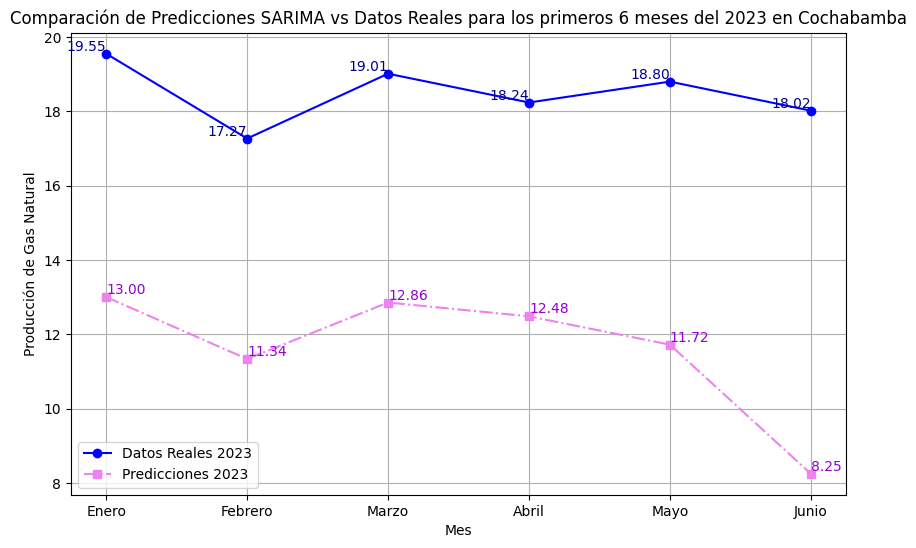

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_sarima, label='Predicciones 2023', marker='s', linestyle='-.', color='violet')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_sarima):
    plt.text(meses[i], predicciones_sarima[i], f"{txt:.2f}", color='darkviolet', ha='left', va='bottom')
plt.title('Comparación de Predicciones SARIMA vs Datos Reales para los primeros 6 meses del 2023 en Cochabamba')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Comparativa

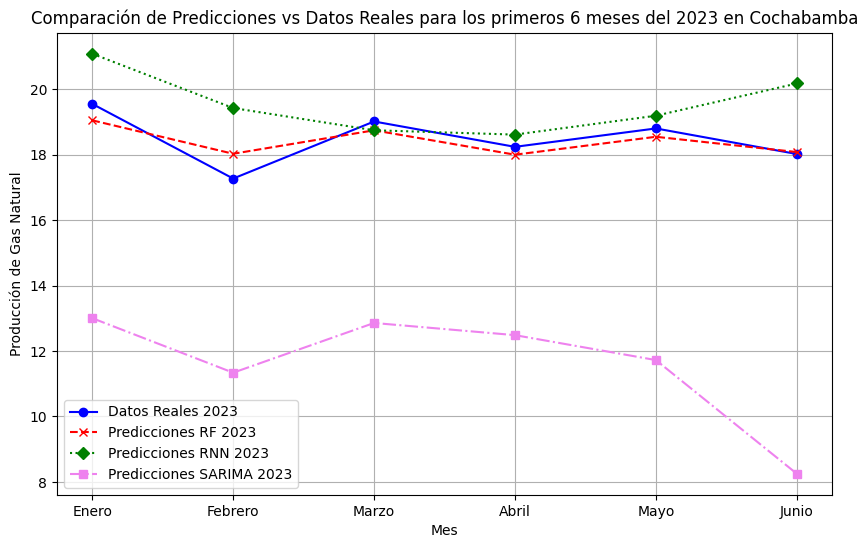

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones RF 2023', marker='x', linestyle='--', color='red')
plt.plot(meses, predicciones_rnn, label='Predicciones RNN 2023', marker='D', linestyle=':', color='green')
plt.plot(meses, predicciones_sarima, label='Predicciones SARIMA 2023', marker='s', linestyle='-.', color='violet')
plt.title('Comparación de Predicciones vs Datos Reales para los primeros 6 meses del 2023 en Cochabamba')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

In [66]:
datos_reales

array([19.55026473, 17.26877612, 19.01272596, 18.23777873, 18.79972662,
       18.01840809])

In [67]:
predicciones_rf

[19.04775771120225,
 18.026443338623768,
 18.742867038222652,
 17.997869370081652,
 18.545271641275804,
 18.07880128219841]

In [68]:
predicciones_rnn

[21.0828, 19.423283, 18.744053, 18.611574, 19.189024, 20.173056]

In [69]:
predicciones_sarima

array([13.00314758, 11.33740544, 12.85659606, 12.48464778, 11.72284654,
        8.25076828])

## **SANTA CRUZ**

### Random Forest

In [70]:
# Crear características lag para SANTA CRUZ
for lag in range(1, 13):
    data_csv[f'SANTA CRUZ_LAG_{lag}'] = data_csv['SANTA CRUZ'].shift(12 - lag + 1)

In [71]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rf = data_csv.dropna()

In [72]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rf[[f'SANTA CRUZ_LAG_{lag}' for lag in range(1, 13)]]

In [73]:
# Variable dependiente (objetivo)
y = data_rf['SANTA CRUZ']

In [74]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Crear y entrenar el modelo Random Forest
rf_model_sc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sc.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
# El modelo está entrenado, ahora prepararemos la lógica para hacer las predicciones para los próximos 6 meses

# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_csv[data_csv['AÑO'] == 2022]['SANTA CRUZ'].values

In [77]:
# Realizar predicciones para los primeros 6 meses del 2023
predicciones_rf = []
for _ in range(6):
    predicted_production = rf_model_sc.predict(np.array(input_features).reshape(1, -1))
    predicciones_rf.append(predicted_production[0])
    input_features = np.append(input_features[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [78]:
predicciones_rf

[469.82507784216324,
 453.4455121518381,
 450.6942278889757,
 460.7937035795047,
 436.00342195715393,
 441.445614657655]

In [79]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['SANTA CRUZ'].values

In [80]:
datos_reales

array([462.28549131, 405.72872479, 453.58459787, 428.1498201 ,
       387.86522635, 391.87918801])

In [81]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rf)
mae = np.mean(np.abs(datos_reales - predicciones_rf))

In [82]:
# Error cuadrático medio Random Forest
mse

1363.6385091604188

In [83]:
# Error absoluto medio Random Forest
mae

31.41587493423692

In [84]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

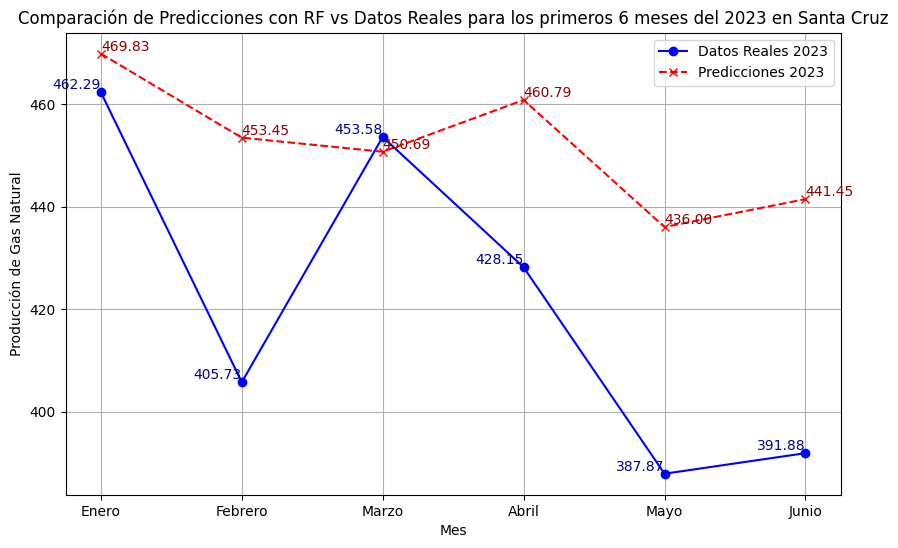

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones 2023', marker='x', linestyle='--', color='red')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rf):
    plt.text(meses[i], predicciones_rf[i], f"{txt:.2f}", color='darkred', ha='left', va='bottom')
plt.title('Comparación de Predicciones con RF vs Datos Reales para los primeros 6 meses del 2023 en Santa Cruz')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Red Neuronal Recurrente (RNN)

In [86]:
#Crear dataframe
data_rnn = data_csv.copy()

In [87]:
# Instanciar MinMaxScaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

In [88]:
# Escalar la columna SANTA CRUZ y reemplazar en el nuevo dataframe
data_rnn['SANTA CRUZ'] = scaler.fit_transform(data_rnn[['SANTA CRUZ']].values.reshape(-1, 1))

In [89]:
# Crear características lag para SANTA CRUZ
for lag in range(1, 13):
    data_rnn[f'SANTA CRUZ_LAG_{lag}'] = data_rnn['SANTA CRUZ'].shift(12 - lag + 1)

In [90]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rnn = data_rnn.dropna()

In [91]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rnn[[f'SANTA CRUZ_LAG_{lag}' for lag in range(1, 13)]].values

In [92]:
# Variable dependiente (objetivo)
y = data_rnn['SANTA CRUZ'].values

In [93]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [94]:
# Construir el modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, verbose=0)

In [96]:
# Preparar para hacer predicciones para los próximos 6 meses
# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_rnn[data_rnn['AÑO'] == 2022]['SANTA CRUZ'].values

In [97]:
# Lista para almacenar las predicciones
predicciones_rnn = []

for _ in range(6):
    # Escalar los últimos 12 valores
    input_features_scaled = scaler.transform(input_features.reshape(-1, 1)).reshape(1, 12, 1)

    # Hacer la predicción para el siguiente mes
    prediccion_produccion = model.predict(input_features_scaled)

    # Invertir la escala para obtener la predicción real
    prediccion_produccion_real = scaler.inverse_transform(prediccion_produccion)

    # Añadir la predicción al conjunto de datos conocido
    input_features = np.append(input_features[1:], prediccion_produccion_real)

    # Añadir la predicción a la lista de predicciones
    predicciones_rnn.append(prediccion_produccion_real[0][0])

1/1 [==============================] - 0s 24ms/step


In [98]:
predicciones_rnn

[800.67194, 1030.7081, 1266.2769, 1435.3079, 1400.0215, 1529.8646]

In [99]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['SANTA CRUZ'].values

In [100]:
datos_reales

array([462.28549131, 405.72872479, 453.58459787, 428.1498201 ,
       387.86522635, 391.87918801])

In [101]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rnn)
mae = np.mean(np.abs(datos_reales - predicciones_rnn))

In [102]:
# Error cuadrático medio Red Neuronal Recurrente
mse

749901.9685940997

In [103]:
# Error absoluto medio Red Neuronal Recurrente
mae

822.2263071127786

In [104]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

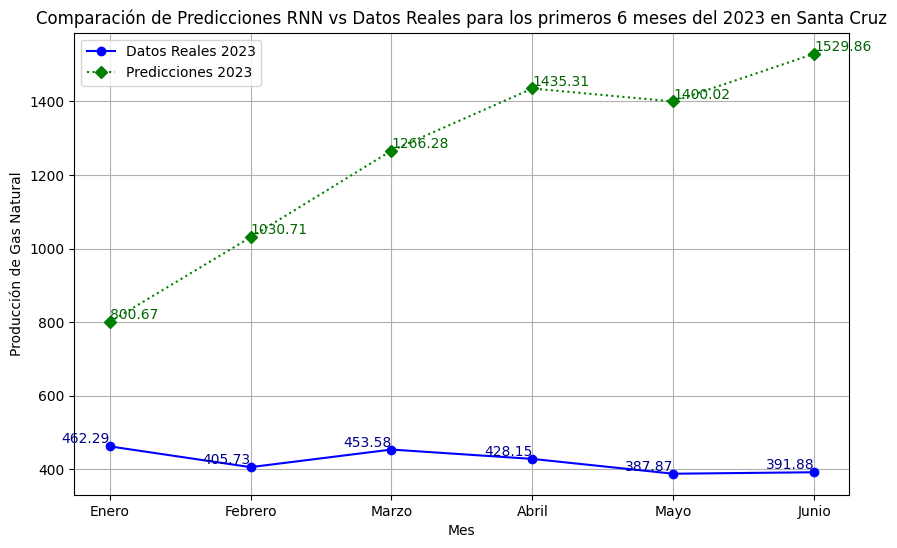

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rnn, label='Predicciones 2023', marker='D', linestyle=':', color='green')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rnn):
    plt.text(meses[i], predicciones_rnn[i], f"{txt:.2f}", color='darkgreen', ha='left', va='bottom')
plt.title('Comparación de Predicciones RNN vs Datos Reales para los primeros 6 meses del 2023 en Santa Cruz')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### SARIMA

In [106]:
# Preparar la serie temporal de SANTA CRUZ
Santa_Cruz_ts = data_csv['SANTA CRUZ']

In [107]:
# Dividir los datos en conjuntos de entrenamiento y prueba (No es necesario para la predicción futura, pero se muestra para completitud)
train_size = int(len(Santa_Cruz_ts) * 0.8)
train_data = Santa_Cruz_ts[:train_size]
test_data = Santa_Cruz_ts[train_size:]

In [108]:
# Ajustar el modelo SARIMA con los datos de entrenamiento
model_sarima = SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(2, 2, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit_sc = model_sarima.fit(disp=False)  # disp=False para reducir la salida durante el ajuste

In [109]:
# Revisar el índice para los valores del año 2023
data_csv[(data_csv['AÑO'] == 2023)]['SANTA CRUZ']

120    462.285491
121    405.728725
122    453.584598
123    428.149820
124    387.865226
125    391.879188
126    403.755077
127    401.281582
128    395.182701
129    394.888734
Name: SANTA CRUZ, dtype: float64

In [110]:
# Realizamos predicciones para 2023 con SARIMA
predicciones_sarima = model_sarima_fit_sc.predict(start=120, end=125).values

In [111]:
predicciones_sarima

array([517.03349258, 401.16924621, 364.70564671, 180.66851095,
       370.71352865, 434.62132426])

In [112]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['SANTA CRUZ'].values

In [113]:
datos_reales

array([462.28549131, 405.72872479, 453.58459787, 428.1498201 ,
       387.86522635, 391.87918801])

In [114]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_sarima)
mae = np.mean(np.abs(datos_reales - predicciones_sarima))

In [115]:
# Error cuadrático medio SARIMA
mse

12380.944962454225

In [116]:
# Error absoluto medio SARIMA
mae

75.9269290203212

In [117]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

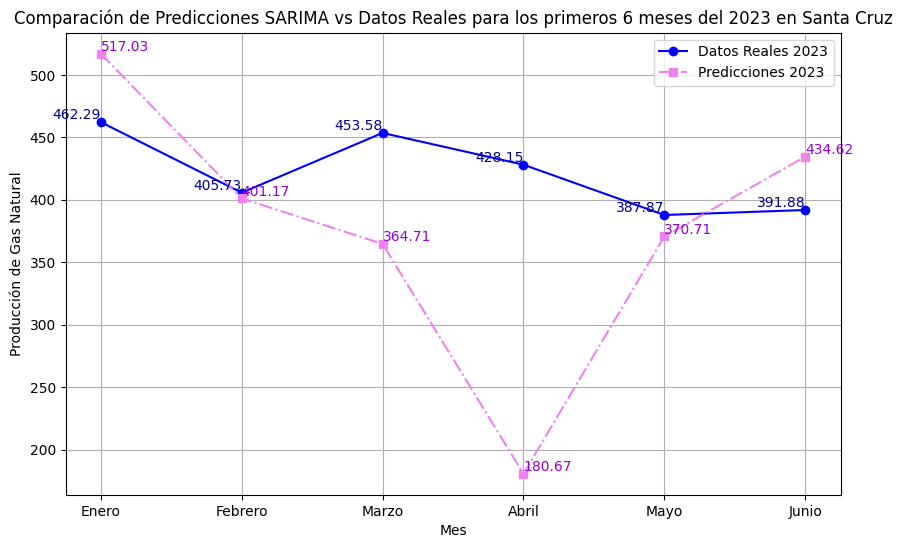

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_sarima, label='Predicciones 2023', marker='s', linestyle='-.', color='violet')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_sarima):
    plt.text(meses[i], predicciones_sarima[i], f"{txt:.2f}", color='darkviolet', ha='left', va='bottom')
plt.title('Comparación de Predicciones SARIMA vs Datos Reales para los primeros 6 meses del 2023 en Santa Cruz')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Comparativa

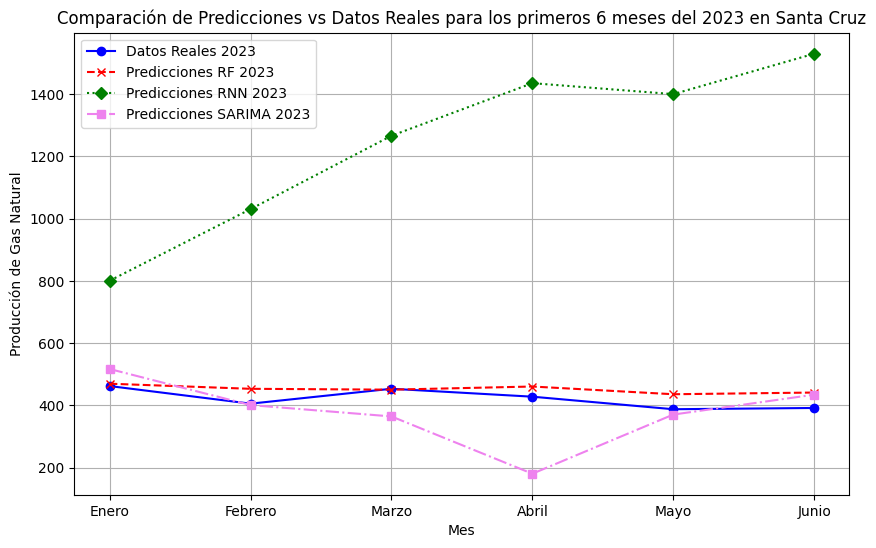

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones RF 2023', marker='x', linestyle='--', color='red')
plt.plot(meses, predicciones_rnn, label='Predicciones RNN 2023', marker='D', linestyle=':', color='green')
plt.plot(meses, predicciones_sarima, label='Predicciones SARIMA 2023', marker='s', linestyle='-.', color='violet')
plt.title('Comparación de Predicciones vs Datos Reales para los primeros 6 meses del 2023 en Santa Cruz')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

In [120]:
datos_reales

array([462.28549131, 405.72872479, 453.58459787, 428.1498201 ,
       387.86522635, 391.87918801])

In [121]:
predicciones_rf

[469.82507784216324,
 453.4455121518381,
 450.6942278889757,
 460.7937035795047,
 436.00342195715393,
 441.445614657655]

In [122]:
predicciones_rnn

[800.67194, 1030.7081, 1266.2769, 1435.3079, 1400.0215, 1529.8646]

In [123]:
predicciones_sarima

array([517.03349258, 401.16924621, 364.70564671, 180.66851095,
       370.71352865, 434.62132426])

## **CHUQUISACA**

### Random Forest

In [124]:
# Crear características lag para CHUQUISACA
for lag in range(1, 13):
    data_csv[f'CHUQUISACA_LAG_{lag}'] = data_csv['CHUQUISACA'].shift(12 - lag + 1)

In [125]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rf = data_csv.dropna()

In [126]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rf[[f'CHUQUISACA_LAG_{lag}' for lag in range(1, 13)]]

In [127]:
# Variable dependiente (objetivo)
y = data_rf['CHUQUISACA']

In [128]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Crear y entrenar el modelo Random Forest
rf_model_ch = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_ch.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [130]:
# El modelo está entrenado, ahora prepararemos la lógica para hacer las predicciones para los próximos 6 meses

# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_csv[data_csv['AÑO'] == 2022]['CHUQUISACA'].values

In [131]:
# Realizar predicciones para los primeros 6 meses del 2023
predicciones_rf = []
for _ in range(6):
    predicted_production = rf_model_ch.predict(np.array(input_features).reshape(1, -1))
    predicciones_rf.append(predicted_production[0])
    input_features = np.append(input_features[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [132]:
predicciones_rf

[204.2863933887553,
 199.41915085005738,
 194.65291479847784,
 182.32328552213824,
 178.31495884408793,
 189.4967223725116]

In [133]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['CHUQUISACA'].values

In [134]:
datos_reales

array([207.71680902, 183.79323334, 204.91474344, 193.76277504,
       168.01947363, 190.53601335])

In [135]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rf)
mae = np.mean(np.abs(datos_reales - predicciones_rf))

In [136]:
# Error cuadrático medio Random Forest
mse

99.86353970780921

In [137]:
# Error absoluto medio Random Forest
mae

8.68207124640206

In [138]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

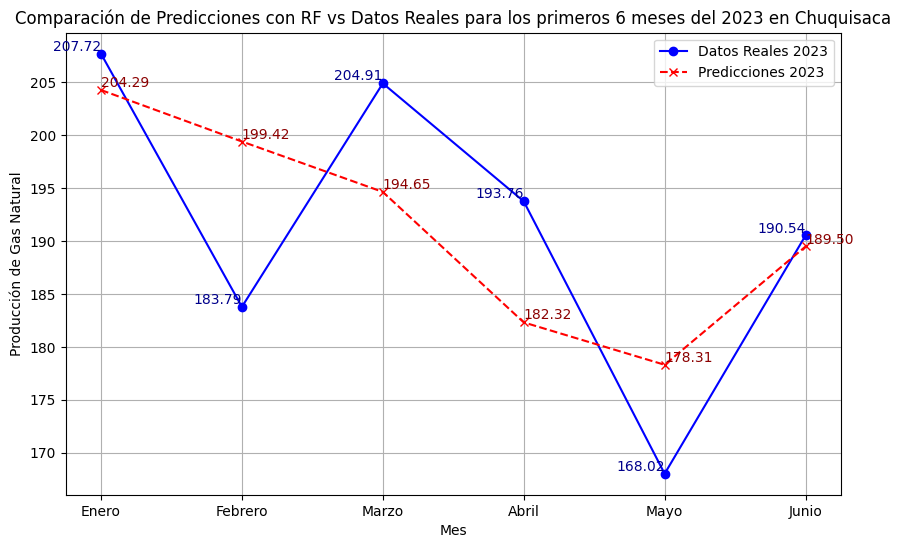

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones 2023', marker='x', linestyle='--', color='red')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rf):
    plt.text(meses[i], predicciones_rf[i], f"{txt:.2f}", color='darkred', ha='left', va='bottom')
plt.title('Comparación de Predicciones con RF vs Datos Reales para los primeros 6 meses del 2023 en Chuquisaca')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Red Neuronal Recurrente (RNN)

In [140]:
#Crear dataframe
data_rnn = data_csv.copy()

In [141]:
# Instanciar MinMaxScaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

In [142]:
# Escalar la columna CHUQUISACA y reemplazar en el nuevo dataframe
data_rnn['CHUQUISACA'] = scaler.fit_transform(data_rnn[['CHUQUISACA']].values.reshape(-1, 1))

In [143]:
# Crear características lag para CHUQUISACA
for lag in range(1, 13):
    data_rnn[f'CHUQUISACA_LAG_{lag}'] = data_rnn['CHUQUISACA'].shift(12 - lag + 1)

In [144]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rnn = data_rnn.dropna()

In [145]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rnn[[f'CHUQUISACA_LAG_{lag}' for lag in range(1, 13)]].values

In [146]:
# Variable dependiente (objetivo)
y = data_rnn['CHUQUISACA'].values

In [147]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [148]:
# Construir el modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [149]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, verbose=0)

In [150]:
# Preparar para hacer predicciones para los próximos 6 meses
# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_rnn[data_rnn['AÑO'] == 2022]['CHUQUISACA'].values

In [151]:
# Lista para almacenar las predicciones
predicciones_rnn = []

for _ in range(6):
    # Escalar los últimos 12 valores
    input_features_scaled = scaler.transform(input_features.reshape(-1, 1)).reshape(1, 12, 1)

    # Hacer la predicción para el siguiente mes
    prediccion_produccion = model.predict(input_features_scaled)

    # Invertir la escala para obtener la predicción real
    prediccion_produccion_real = scaler.inverse_transform(prediccion_produccion)

    # Añadir la predicción al conjunto de datos conocido
    input_features = np.append(input_features[1:], prediccion_produccion_real)

    # Añadir la predicción a la lista de predicciones
    predicciones_rnn.append(prediccion_produccion_real[0][0])

1/1 [==============================] - 0s 25ms/step


In [152]:
predicciones_rnn

[42.6558, 73.60492, 90.09888, 94.25461, 107.63871, 120.67527]

In [153]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['CHUQUISACA'].values

In [154]:
datos_reales

array([207.71680902, 183.79323334, 204.91474344, 193.76277504,
       168.01947363, 190.53601335])

In [155]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rnn)
mae = np.mean(np.abs(datos_reales - predicciones_rnn))

In [156]:
# Error cuadrático medio Red Neuronal Recurrente
mse

11832.919967001226

In [157]:
# Error absoluto medio Red Neuronal Recurrente
mae

103.3024772184621

In [158]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

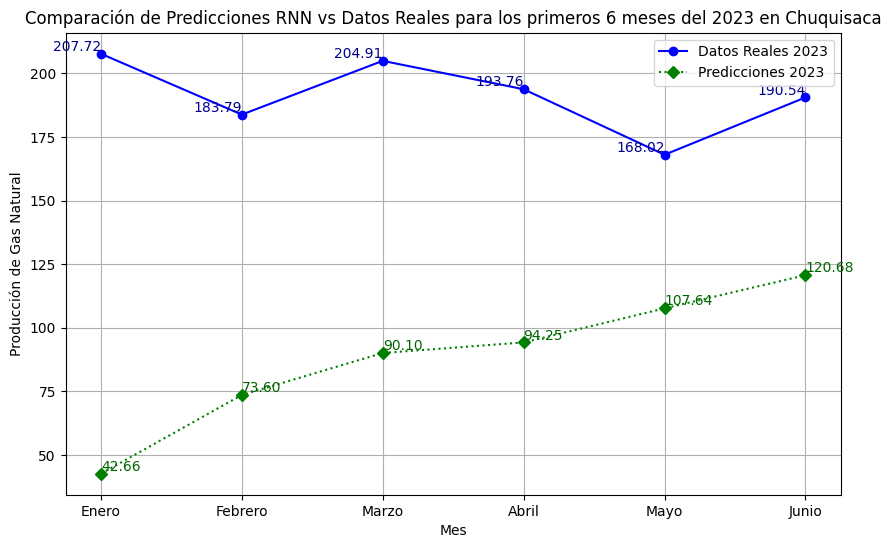

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rnn, label='Predicciones 2023', marker='D', linestyle=':', color='green')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rnn):
    plt.text(meses[i], predicciones_rnn[i], f"{txt:.2f}", color='darkgreen', ha='left', va='bottom')
plt.title('Comparación de Predicciones RNN vs Datos Reales para los primeros 6 meses del 2023 en Chuquisaca')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### SARIMA

In [160]:
# Preparar la serie temporal de CHUQUISACA
Chuquisaca_ts = data_csv['CHUQUISACA']

In [161]:
# Dividir los datos en conjuntos de entrenamiento y prueba (No es necesario para la predicción futura, pero se muestra para completitud)
train_size = int(len(Chuquisaca_ts) * 0.8)
train_data = Chuquisaca_ts[:train_size]
test_data = Chuquisaca_ts[train_size:]

In [162]:
# Ajustar el modelo SARIMA con los datos de entrenamiento
model_sarima = SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(2, 2, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit_ch = model_sarima.fit(disp=False)  # disp=False para reducir la salida durante el ajuste

In [163]:
# Revisar el índice para los valores del año 2023
data_csv[(data_csv['AÑO'] == 2023)]['CHUQUISACA']

120    207.716809
121    183.793233
122    204.914743
123    193.762775
124    168.019474
125    190.536013
126    192.835313
127    179.180872
128    181.678191
129    184.955895
Name: CHUQUISACA, dtype: float64

In [164]:
# Realizamos predicciones para 2023 con SARIMA
predicciones_sarima = model_sarima_fit_ch.predict(start=120, end=125).values

In [165]:
predicciones_sarima

array([151.15933688, 115.30273835, 146.18192053, 114.18964609,
       129.57761571, 135.24797742])

In [166]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['CHUQUISACA'].values

In [167]:
datos_reales

array([207.71680902, 183.79323334, 204.91474344, 193.76277504,
       168.01947363, 190.53601335])

In [168]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_sarima)
mae = np.mean(np.abs(datos_reales - predicciones_sarima))

In [169]:
# Error cuadrático medio SARIMA
mse

3700.94437563936

In [170]:
# Error absoluto medio SARIMA
mae

59.5139688064285

In [171]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

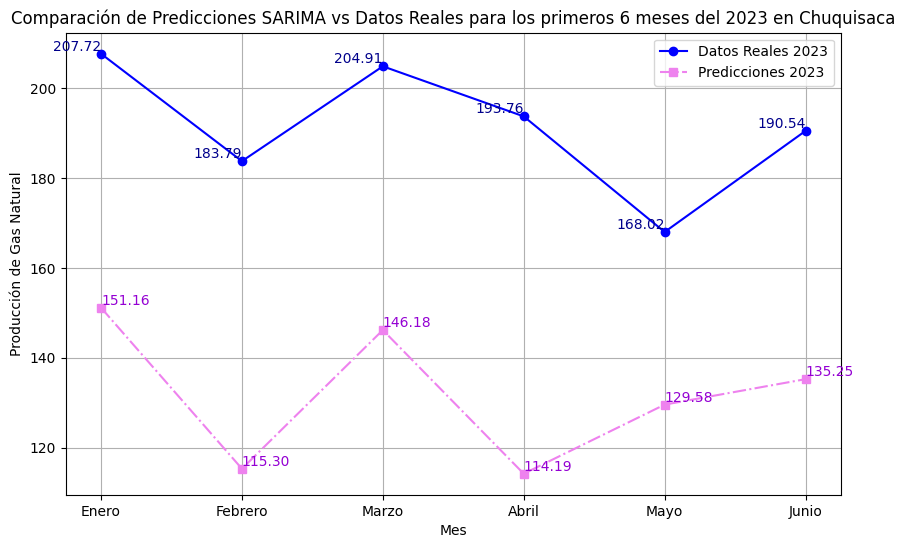

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_sarima, label='Predicciones 2023', marker='s', linestyle='-.', color='violet')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_sarima):
    plt.text(meses[i], predicciones_sarima[i], f"{txt:.2f}", color='darkviolet', ha='left', va='bottom')
plt.title('Comparación de Predicciones SARIMA vs Datos Reales para los primeros 6 meses del 2023 en Chuquisaca')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Comparativa

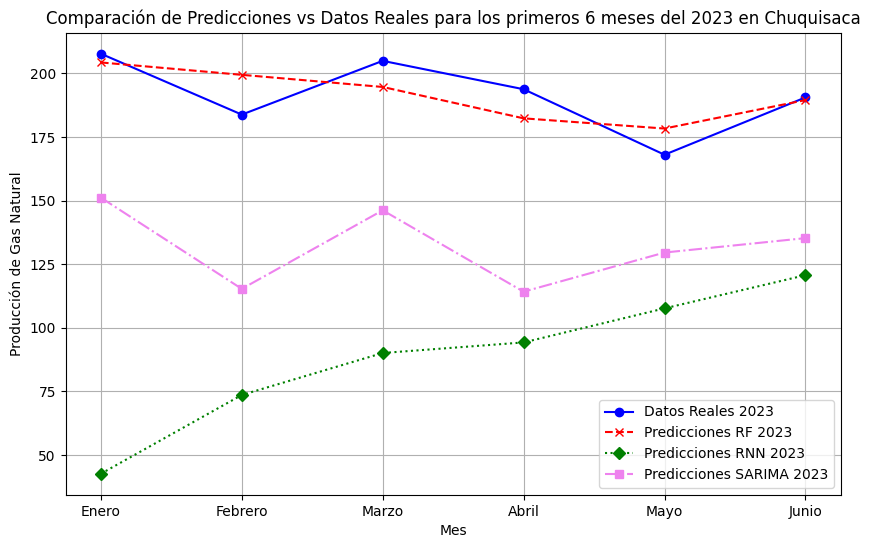

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones RF 2023', marker='x', linestyle='--', color='red')
plt.plot(meses, predicciones_rnn, label='Predicciones RNN 2023', marker='D', linestyle=':', color='green')
plt.plot(meses, predicciones_sarima, label='Predicciones SARIMA 2023', marker='s', linestyle='-.', color='violet')
plt.title('Comparación de Predicciones vs Datos Reales para los primeros 6 meses del 2023 en Chuquisaca')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

In [174]:
datos_reales

array([207.71680902, 183.79323334, 204.91474344, 193.76277504,
       168.01947363, 190.53601335])

In [175]:
predicciones_rf

[204.2863933887553,
 199.41915085005738,
 194.65291479847784,
 182.32328552213824,
 178.31495884408793,
 189.4967223725116]

In [176]:
predicciones_rnn

[42.6558, 73.60492, 90.09888, 94.25461, 107.63871, 120.67527]

In [177]:
predicciones_sarima

array([151.15933688, 115.30273835, 146.18192053, 114.18964609,
       129.57761571, 135.24797742])

## **TARIJA**

### Random Forest

In [178]:
# Crear características lag para TARIJA
for lag in range(1, 13):
    data_csv[f'TARIJA_LAG_{lag}'] = data_csv['TARIJA'].shift(12 - lag + 1)

In [179]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rf = data_csv.dropna()

In [180]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rf[[f'TARIJA_LAG_{lag}' for lag in range(1, 13)]]

In [181]:
# Variable dependiente (objetivo)
y = data_rf['TARIJA']

In [182]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Crear y entrenar el modelo Random Forest
rf_model_tr = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_tr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [184]:
# El modelo está entrenado, ahora prepararemos la lógica para hacer las predicciones para los próximos 6 meses

# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_csv[data_csv['AÑO'] == 2022]['TARIJA'].values

In [185]:
# Realizar predicciones para los primeros 6 meses del 2023
predicciones_rf = []
for _ in range(6):
    predicted_production = rf_model_tr.predict(np.array(input_features).reshape(1, -1))
    predicciones_rf.append(predicted_production[0])
    input_features = np.append(input_features[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [186]:
predicciones_rf

[537.5296925302713,
 527.8046739128838,
 531.0863431089078,
 512.1363899401877,
 507.95042044040224,
 506.9551896342589]

In [187]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['TARIJA'].values

In [188]:
datos_reales

array([542.23610421, 485.58603707, 532.94132473, 512.23216461,
       496.69657792, 504.1602483 ])

In [189]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rf)
mae = np.mean(np.abs(datos_reales - predicciones_rf))

In [190]:
# Error cuadrático medio Random Forest
mse

323.7457342748062

In [191]:
# Error absoluto medio Random Forest
mae

10.487431444879661

In [192]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

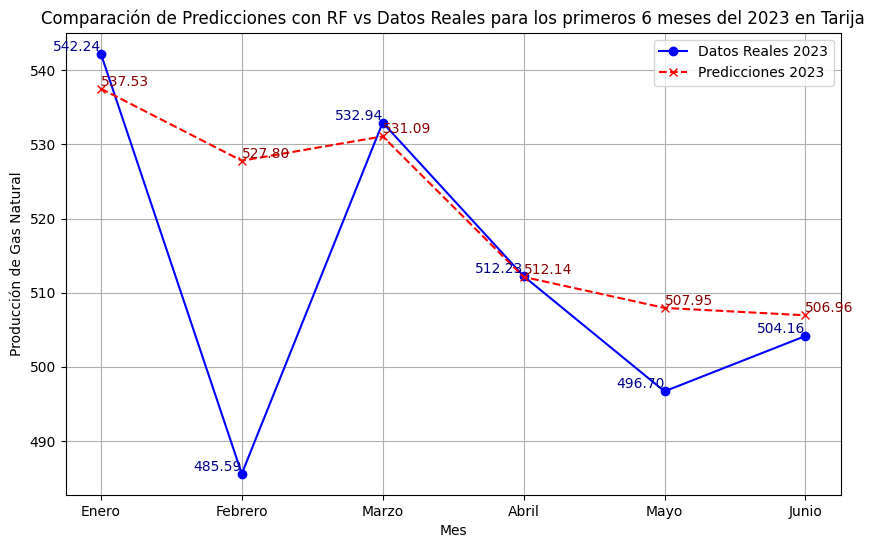

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones 2023', marker='x', linestyle='--', color='red')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rf):
    plt.text(meses[i], predicciones_rf[i], f"{txt:.2f}", color='darkred', ha='left', va='bottom')
plt.title('Comparación de Predicciones con RF vs Datos Reales para los primeros 6 meses del 2023 en Tarija')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Red Neuronal Recurrente (RNN)

In [194]:
#Crear dataframe
data_rnn = data_csv.copy()

In [195]:
# Instanciar MinMaxScaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

In [196]:
# Escalar la columna TARIJA y reemplazar en el nuevo dataframe
data_rnn['TARIJA'] = scaler.fit_transform(data_rnn[['TARIJA']].values.reshape(-1, 1))

In [197]:
# Crear características lag para TARIJA
for lag in range(1, 13):
    data_rnn[f'TARIJA_LAG_{lag}'] = data_rnn['TARIJA'].shift(12 - lag + 1)

In [198]:
# Eliminar filas con valores NaN creados por el desplazamiento
data_rnn = data_rnn.dropna()

In [199]:
# Variables independientes (características) - excluyendo columnas no necesarias y utilizando lags
X = data_rnn[[f'TARIJA_LAG_{lag}' for lag in range(1, 13)]].values

In [200]:
# Variable dependiente (objetivo)
y = data_rnn['TARIJA'].values

In [201]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [202]:
# Construir el modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [203]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, verbose=0)

In [204]:
# Preparar para hacer predicciones para los próximos 6 meses
# Seleccionar los datos del año 2022 como entrada para la predicción
input_features = data_rnn[data_rnn['AÑO'] == 2022]['TARIJA'].values

In [205]:
# Lista para almacenar las predicciones
predicciones_rnn = []

for _ in range(6):
    # Escalar los últimos 12 valores
    input_features_scaled = scaler.transform(input_features.reshape(-1, 1)).reshape(1, 12, 1)

    # Hacer la predicción para el siguiente mes
    prediccion_produccion = model.predict(input_features_scaled)

    # Invertir la escala para obtener la predicción real
    prediccion_produccion_real = scaler.inverse_transform(prediccion_produccion)

    # Añadir la predicción al conjunto de datos conocido
    input_features = np.append(input_features[1:], prediccion_produccion_real)

    # Añadir la predicción a la lista de predicciones
    predicciones_rnn.append(prediccion_produccion_real[0][0])

1/1 [==============================] - 0s 22ms/step


In [206]:
predicciones_rnn

[797.7998, 860.7619, 909.0492, 888.5812, 827.94165, 792.72186]

In [207]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['TARIJA'].values

In [208]:
datos_reales

array([542.23610421, 485.58603707, 532.94132473, 512.23216461,
       496.69657792, 504.1602483 ])

In [209]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_rnn)
mae = np.mean(np.abs(datos_reales - predicciones_rnn))

In [210]:
# Error cuadrático medio Red Neuronal Recurrente
mse

113692.75773913787

In [211]:
# Error absoluto medio Red Neuronal Recurrente
mae

333.8338556626021

In [212]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

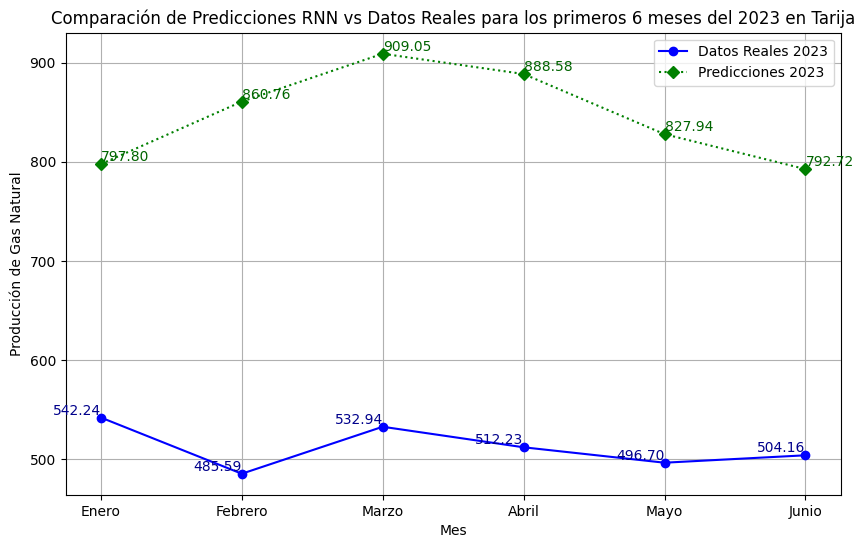

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rnn, label='Predicciones 2023', marker='D', linestyle=':', color='green')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_rnn):
    plt.text(meses[i], predicciones_rnn[i], f"{txt:.2f}", color='darkgreen', ha='left', va='bottom')
plt.title('Comparación de Predicciones RNN vs Datos Reales para los primeros 6 meses del 2023 en Tarija')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### SARIMA

In [214]:
# Preparar la serie temporal de TARIJA
Tarija_ts = data_csv['TARIJA']

In [215]:
# Dividir los datos en conjuntos de entrenamiento y prueba (No es necesario para la predicción futura, pero se muestra para completitud)
train_size = int(len(Tarija_ts) * 0.8)
train_data = Tarija_ts[:train_size]
test_data = Tarija_ts[train_size:]

In [216]:
# Ajustar el modelo SARIMA con los datos de entrenamiento
model_sarima = SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(2, 2, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit_tr = model_sarima.fit(disp=False)  # disp=False para reducir la salida durante el ajuste

In [217]:
# Revisar el índice para los valores del año 2023
data_csv[(data_csv['AÑO'] == 2023)]['TARIJA']

120    542.236104
121    485.586037
122    532.941325
123    512.232165
124    496.696578
125    504.160248
126    518.185471
127    494.053058
128    487.430370
129    497.254278
Name: TARIJA, dtype: float64

In [218]:
# Realizamos predicciones para 2023 con SARIMA
predicciones_sarima = model_sarima_fit_tr.predict(start=120, end=125).values

In [219]:
predicciones_sarima

array([619.55846585, 496.3558195 , 486.97753826, 373.14146436,
       416.61789327, 462.13851458])

In [220]:
# Datos reales de los primeros 6 meses del 2023
datos_reales = data_csv[(data_csv['AÑO'] == 2023) & (data_csv['MES'] <= 6)]['TARIJA'].values

In [221]:
datos_reales

array([542.23610421, 485.58603707, 532.94132473, 512.23216461,
       496.69657792, 504.1602483 ])

In [222]:
# Cálculo de errores
mse = mean_squared_error(datos_reales, predicciones_sarima)
mae = np.mean(np.abs(datos_reales - predicciones_sarima))

In [223]:
# Error cuadrático medio SARIMA
mse

5955.341704132809

In [224]:
# Error absoluto medio SARIMA
mae

65.87450819087796

In [225]:
# Preparación para la visualización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

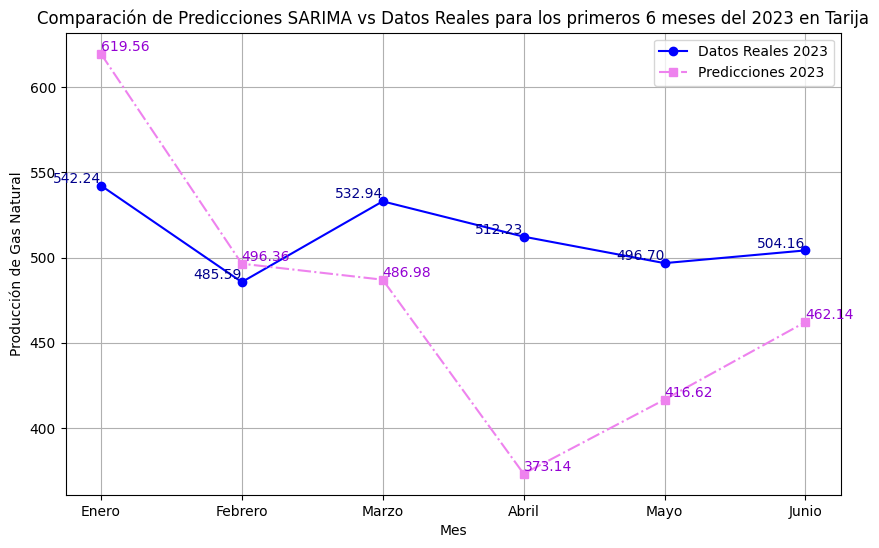

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_sarima, label='Predicciones 2023', marker='s', linestyle='-.', color='violet')
for i, txt in enumerate(datos_reales):
    plt.text(meses[i], datos_reales[i], f"{txt:.2f}", color='darkblue', ha='right', va='bottom')
for i, txt in enumerate(predicciones_sarima):
    plt.text(meses[i], predicciones_sarima[i], f"{txt:.2f}", color='darkviolet', ha='left', va='bottom')
plt.title('Comparación de Predicciones SARIMA vs Datos Reales para los primeros 6 meses del 2023 en Tarija')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

### Comparativa

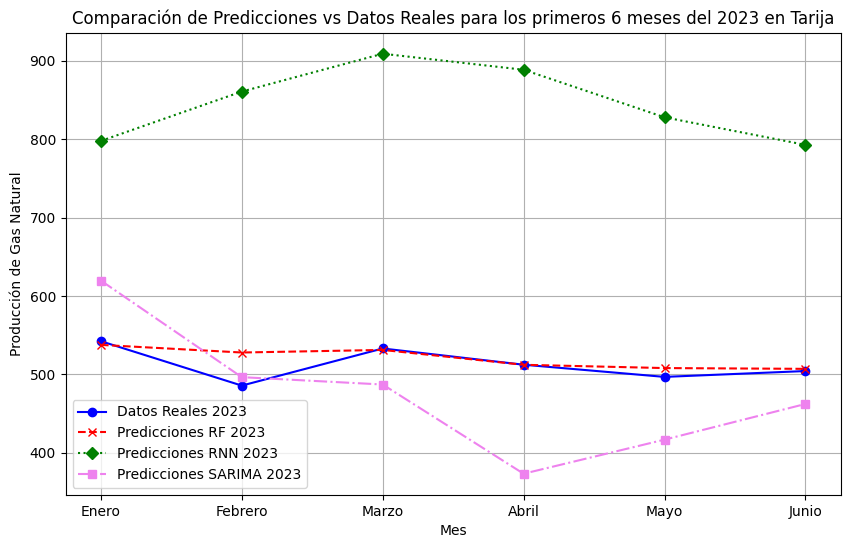

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(meses, datos_reales, label='Datos Reales 2023', marker='o', color='blue')
plt.plot(meses, predicciones_rf, label='Predicciones RF 2023', marker='x', linestyle='--', color='red')
plt.plot(meses, predicciones_rnn, label='Predicciones RNN 2023', marker='D', linestyle=':', color='green')
plt.plot(meses, predicciones_sarima, label='Predicciones SARIMA 2023', marker='s', linestyle='-.', color='violet')
plt.title('Comparación de Predicciones vs Datos Reales para los primeros 6 meses del 2023 en Tarija')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

In [228]:
datos_reales

array([542.23610421, 485.58603707, 532.94132473, 512.23216461,
       496.69657792, 504.1602483 ])

In [229]:
predicciones_rf

[537.5296925302713,
 527.8046739128838,
 531.0863431089078,
 512.1363899401877,
 507.95042044040224,
 506.9551896342589]

In [230]:
predicciones_rnn

[797.7998, 860.7619, 909.0492, 888.5812, 827.94165, 792.72186]

In [231]:
predicciones_sarima

array([619.55846585, 496.3558195 , 486.97753826, 373.14146436,
       416.61789327, 462.13851458])

# **PREDICCIONES A FUTURO**

In [232]:
# Preparación para la visualización
meses = ['Nov23', 'Dic23', 'Ene24', 'Feb24', 'Mar24', 'Abr24', 'May24', 'Jun24']

## Cochabamba

In [233]:
# Últimos 12 valores de COCHABAMBA
last_cb = data_csv[-12:]['COCHABAMBA'].values

In [234]:
# Realizar predicciones para los siguientes 8 meses con Random Forest
predicciones1_rf = []
for _ in range(8):
    predicted_production = rf_model_cb.predict(np.array(last_cb).reshape(1, -1))
    predicciones1_rf.append(predicted_production[0])
    last_cb = np.append(last_cb[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [235]:
predicciones1_rf

[18.209809847251748,
 18.064961820084605,
 18.100116260971312,
 18.0373791579835,
 18.023094847431818,
 17.996328015770665,
 18.016575922843924,
 18.022643772306314]

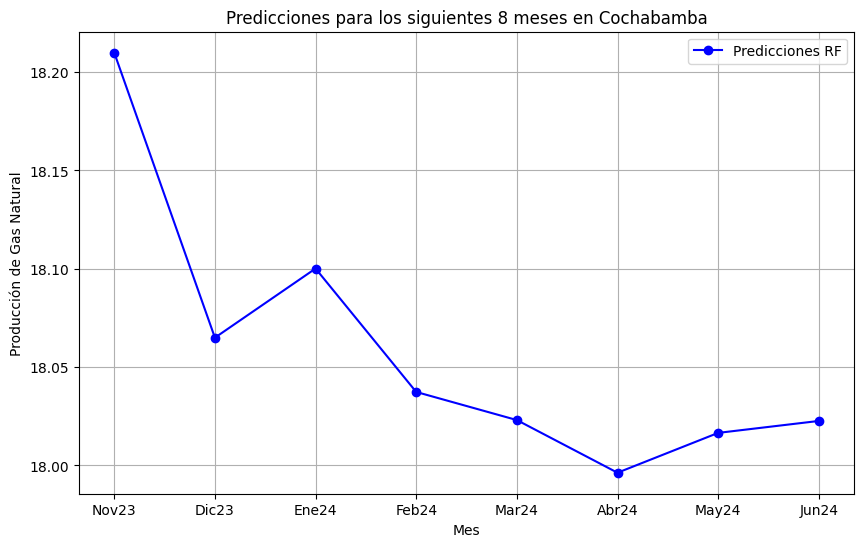

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(meses, predicciones1_rf, label='Predicciones RF', marker='o', color='blue')
plt.title('Predicciones para los siguientes 8 meses en Cochabamba')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

## Santa Cruz

In [237]:
# Últimos 12 valores de SANTA CRUZ
last_sc = data_csv[-12:]['SANTA CRUZ'].values

In [238]:
# Realizar predicciones para los siguientes 8 meses con Random Forest
predicciones2_rf = []
for _ in range(8):
    predicted_production = rf_model_sc.predict(np.array(last_sc).reshape(1, -1))
    predicciones2_rf.append(predicted_production[0])
    last_sc = np.append(last_sc[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [239]:
predicciones2_rf

[377.3875391082038,
 401.1048398914419,
 395.7499797085342,
 392.02320972782474,
 392.01778473719133,
 394.6260866043042,
 384.02234136729254,
 390.3068299427396]

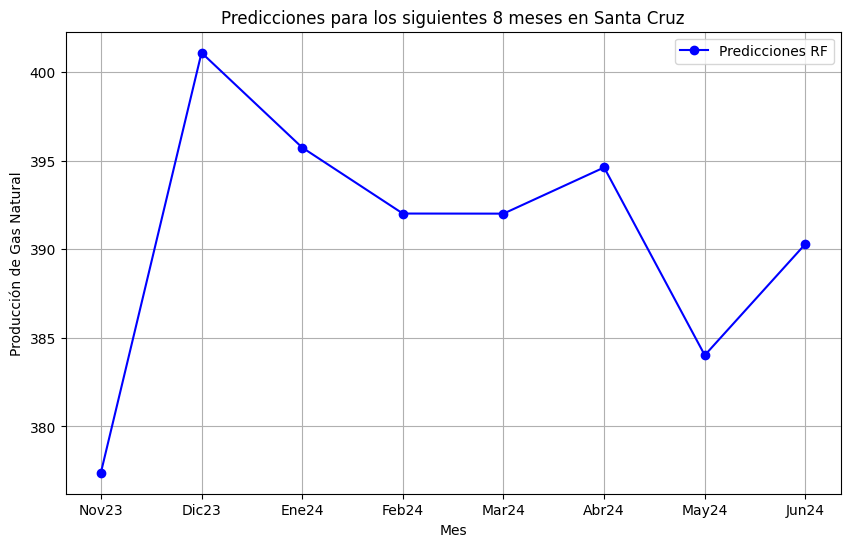

In [240]:
plt.figure(figsize=(10, 6))
plt.plot(meses, predicciones2_rf, label='Predicciones RF', marker='o', color='blue')
plt.title('Predicciones para los siguientes 8 meses en Santa Cruz')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

## Chuquisaca

In [241]:
# Últimos 12 valores de CHUQUISACA
last_ch = data_csv[-12:]['CHUQUISACA'].values

In [242]:
# Realizar predicciones para los siguientes 8 meses con Random Forest
predicciones3_rf = []
for _ in range(8):
    predicted_production = rf_model_ch.predict(np.array(last_ch).reshape(1, -1))
    predicciones3_rf.append(predicted_production[0])
    last_ch = np.append(last_ch[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [243]:
predicciones3_rf

[186.8629568629125,
 183.4788696141454,
 183.0775484675123,
 179.35575755115067,
 176.67073960309298,
 167.8320473290475,
 165.6901577975673,
 162.94744190912417]

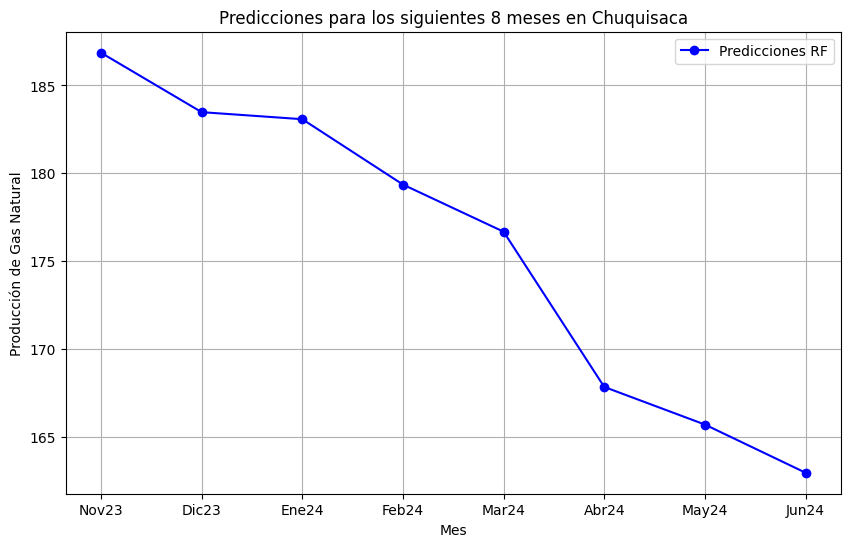

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(meses, predicciones3_rf, label='Predicciones RF', marker='o', color='blue')
plt.title('Predicciones para los siguientes 8 meses en Chuquisaca')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

## Tarija

In [245]:
# Últimos 12 valores de TARIJA
last_tr = data_csv[-12:]['TARIJA'].values

In [246]:
# Realizar predicciones para los siguientes 8 meses con Random Forest
predicciones4_rf = []
for _ in range(8):
    predicted_production = rf_model_tr.predict(np.array(last_tr).reshape(1, -1))
    predicciones4_rf.append(predicted_production[0])
    last_tr = np.append(last_tr[1:], predicted_production[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [247]:
predicciones4_rf

[500.7891969626013,
 503.1627552563599,
 505.80997268555126,
 502.76325179199915,
 504.5598197204506,
 504.76101858525004,
 504.37386523184864,
 502.03982112008555]

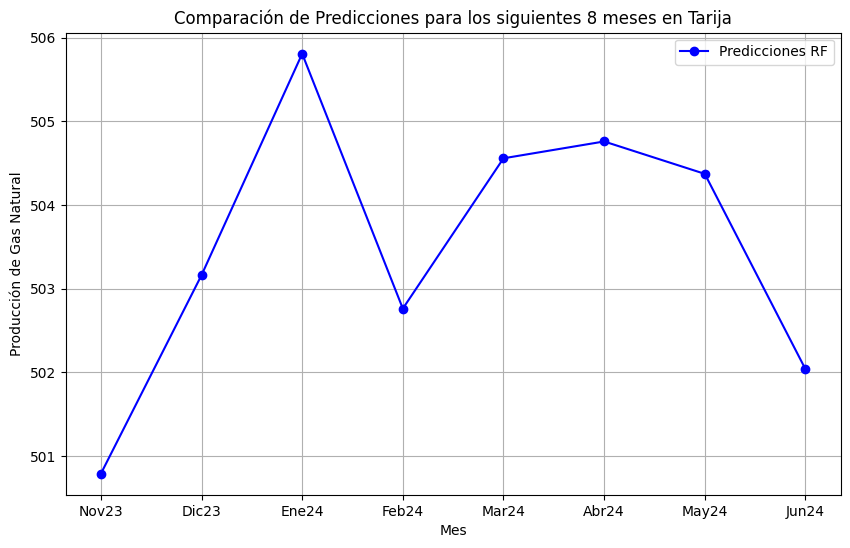

In [248]:
plt.figure(figsize=(10, 6))
plt.plot(meses, predicciones4_rf, label='Predicciones RF', marker='o', color='blue')
plt.title('Comparación de Predicciones para los siguientes 8 meses en Tarija')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()

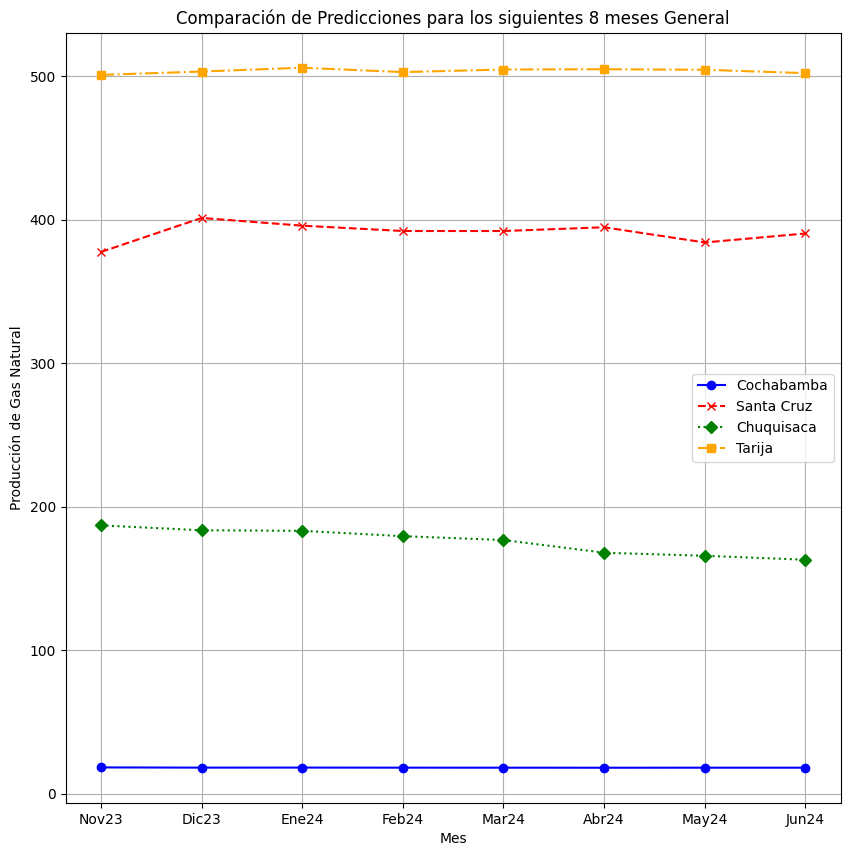

In [249]:
plt.figure(figsize=(10,10))
plt.plot(meses, predicciones1_rf, label='Cochabamba', marker='o', color='blue')
plt.plot(meses, predicciones2_rf, label='Santa Cruz', marker='x', linestyle='--', color='red')
plt.plot(meses, predicciones3_rf, label='Chuquisaca', marker='D', linestyle=':', color='green')
plt.plot(meses, predicciones4_rf, label='Tarija', marker='s', linestyle='-.', color='orange')
plt.title('Comparación de Predicciones para los siguientes 8 meses General')
plt.xlabel('Mes')
plt.ylabel('Producción de Gas Natural')
plt.xticks(meses)
plt.legend()
plt.grid(True)
plt.show()